In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation

In [2]:
data = pd.read_csv("/Users/alexpapiu/Documents/R/Kobe/data.csv")

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [17]:
train = data[data['shot_made_flag'].isnull() == False]

In [18]:
train.shape

(25697, 25)

In [81]:
X = train[['lat','lon','shot_distance']]
y = train['shot_made_flag']

In [82]:
[type(X),type(y)]

[pandas.core.frame.DataFrame, pandas.core.series.Series]

In [92]:
model_knn = KNeighborsClassifier(n_neighbors = 15)

In [93]:
model_knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [94]:
cross_validation.cross_val_score(model_knn, X, y, cv = 5) #5-fold cross validation

array([ 0.57470817,  0.57023346,  0.57579296,  0.58571707,  0.53103717])

In [87]:
grid = GridSearchCV(model_knn, param_grid = {"n_neighbors":np.arange(1,30)}, cv = 5)

In [72]:
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

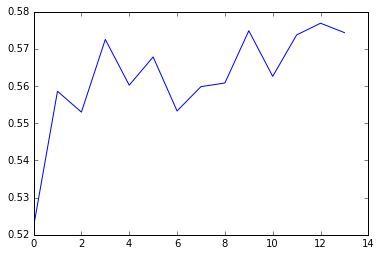

In [78]:
plt.plot([i[1] for i in grid.grid_scores_])